# Random Forest 

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
fp= '/content/drive/My Drive/Colab Notebooks/Datasets/Iris_Data.csv'

In [ ]:
df= pd.read_csv(fp)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# number of datapoints and columns in the DataFrame
print("Number of datapoints: {}".format(len(df)))
print("Number of columns: {}".format(len(df.columns)))

# Print the data types of each column
print("\nData types:")
print(df.dtypes)


Number of datapoints: 150
Number of columns: 5

Data types:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [ ]:
# Select only the numeric columns
numeric_cols = ['sepal_length', 'sepal_width', 'petal_length','petal_width']
numeric_df = df[numeric_cols]

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Display the correlation matrix
print(corr_matrix)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


Text(0, 0.5, 'Density')

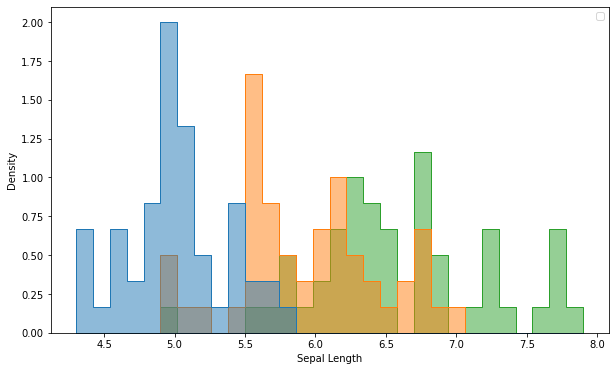

In [ ]:
# Set figure size
plt.figure(figsize=(10,6))

# Plot FICO score histogram for each credit policy status
sns.histplot(data=df, x='sepal_length', hue='species', 
             alpha=0.5, bins=30, 
             stat='density', common_norm=False, 
             element='step', fill=True)

# Add legend and axis labels
plt.legend()
plt.xlabel('Sepal Length')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

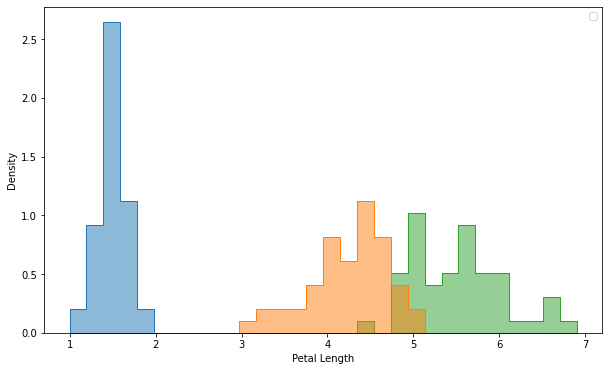

In [ ]:
# Set figure size
plt.figure(figsize=(10,6))

# Plot petal length histogram for each species
sns.histplot(data=df, x='petal_length', hue='species', 
             alpha=0.5, bins=30, 
             stat='density', common_norm=False, 
             element='step', fill=True)

# Add legend and axis labels
plt.legend()
plt.xlabel('Petal Length')
plt.ylabel('Density')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Set X and y variables
X = df.drop('species', axis=1)
y = df['species']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Create random forest classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100)

# Train the model on the training data
rfc.fit(X_train, y_train)

# Make predictions on the testing data
predictions = rfc.predict(X_test)

# Evaluate the performance of the model
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print('ROC AUC score:', roc_auc_score(y_test, rfc.predict_proba(X_test), multi_class='ovo'))
print('Accuracy:', accuracy_score(y_test, predictions))

[[13  0  0]
 [ 0 19  1]
 [ 0  1 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.95      0.95      0.95        20
 Iris-virginica       0.92      0.92      0.92        12

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45

ROC AUC score: 0.9934294871794872
Accuracy: 0.9555555555555556


Conclusion

The random forest classifier trained on the Iris dataset has performed well, with an overall accuracy of 0.96 and good precision, recall, and F1-score for each class. The model has also demonstrated good discriminatory power between the classes, as indicated by the ROC AUC score of 0.993. These results suggest that the model is capable of accurately classifying the species of iris based on the given features.